In the last chapter we introduced k-means. One potential disadvantage of them is that they require us to prespecify the number of clusters/mixtures $k$. Hierarchical clustering is an alternative approach that does not require that we commit to a particular choice of $k$. Hierarchical clustering has an added advantage over k-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.

The most common type of hierarchical clustering is the agglomerative clustering (or bottom-up clustering). It refers to the fact that a dendrogram (generally depicted as an upside-down tree) is built starting from the leaves and combining clusters up to the trunk.

# Dendrogram

Suppose that we have the simulated data in the following figure:

<img src="./figures/dendro.png" alt="Simulated data of 45 observations generated from a three-class model." style="width: 400px;"/>

The data in the figure above consists of 45 observations in two-dimensional space. The data were generated from a three-class model; the true class labels for each observation are shown in distinct colors. However, suppose that the data were observed without the class labels, and that we wanted to perform hierarchical clustering of the data. Hierarchical clustering (with complete linkage, to be discussed later) yields the result shown below. How can we interpret this dendrogram?


<img src="./figures/dendro2.png" alt="Dendrogram" style="width: 300px;"/>


In this dendrogram, each leaf of the dendrogram represents one of the 45 observations. However, as we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other. As we move higher up the tree, branches themselves fuse, either with leaves or other branches. The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other. On the other hand, observations that fuse later (near the top of the tree) can be quite different. In fact, this statement can be made precise: for any two observations, we can look for the point in the tree where branches containing those two observations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. Thus, observations that fuse at the very bottom of the tree are quite similar to each other, whereas observations that fuse close to the top of the tree will tend to be quite different.

An example of interpreting a dendrogram is presented below:

<img src="./figures/dendro3.png" style="width: 600px;"/>

This figure illustrates how to properly interpret a dendrogram with nine observations in two-dimensional space. Left: a dendrogram generated using Euclidean distance and complete linkage. Observations 5 and 7 are quite similar to each other, as are observations 1 and 6. However, observation 9 is no more similar to observation 2 than it is to observations 8, 5, and 7, even though observations 9 and 2 are close together in terms of horizontal distance. This is because observations 2, 8, 5, and 7 all fuse with observation 9 at the same height, approximately 1.8. Right: the raw data used to generate the dendrogram can be used to confirm that indeed, observation 9 is no more similar to observation 2 than it is to observations 8, 5, and 7.

Now that we understand how to interpret the dendrogram, we can move on to the issue of identifying clusters on the basis of a dendrogram. In order to do this, we make a horizontal cut across the dendrogram, as shown in the following figure where we cut the dendro4 at a height of nine results in two clusters.


The following dendrogram from the simulated dataset, cut at a height of nine (indicated by the dashed line). This cut results in two distinct clusters, shown in different colors.

<img src="./figures/dendro4.png" style="width: 300px;"/>

The distinct sets of observations beneath the cut can be interpreted as clusters. In figure below, cutting the dendrogram at a height of five results in three clusters.

The following dendrogram from the simulated dataset, cut at a height of five (indicated by the dashed line). This cut results in three distinct clusters, shown in different colors.

<img src="./figures/dendro5.png" style="width: 300px;"/>

The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height.

# The Hierarchical Clustering Algorithm

The hierarchical clustering dendrogram is obtained via an extremely simple algorithm. We begin by defining some sort of dissimilarity measure between each pair of observations. Most often, Euclidean distance is used. The algorithm proceeds iteratively. Starting out at the bottom of the dendrogram, each of the n observations is treated as its own cluster. The two clusters that are most similar to each other are then fused so that there now are $n−1$ clusters. Next the two clusters that are most similar to each other are fused again, so that there now are $n−2$ clusters. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and the dendrogram is complete.

The figure below depicts the first few steps of the algorithm.

<img src="./figures/cah.png" style="width: 500px;"/>


This figure illustrates the first few steps of the hierarchical clustering algorithm, with complete linkage and Euclidean distance. Top Left: initially, there are nine distinct clusters {1}, {2}, …, {9}. Top Right: the two clusters that are closest together, {5} and {7}, are fused into a single cluster. Bottom Left: the two clusters that are closest together, {6} and {1}, are fused into a single cluster. Bottom Right: the two clusters that are closest together using complete linkage, {8} and the cluster {5, 7}, are fused into a single cluster.


To summarize, the hierarchical clustering algorithm is given in the following Algorithm:

<img src="./figures/algo.png" style="width: 600px;"/>


This algorithm seems simple enough, but one issue has not been addressed. Consider the bottom right panel in the above Figure. How did we determine that the cluster {5, 7} should be fused with the cluster {8}? We have a concept of the dissimilarity between pairs of observations, but how do we define the dissimilarity between two clusters if one or both of the clusters contains multiple observations? The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. This extension is achieved by developing the notion of linkage, which defines the dissimilarity between two groups of observations. The four most common types of linkage: complete, average, single, and centroid are briefly are described as follows:

* **Complete**: Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

* **Single**: Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. The single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time

* **Average**: Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.

* **Centroid**: Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.


Average and complete linkages are generally preferred over single linkage, as they tend to yield more balanced dendrograms. Centroid linkage is often used in genomics.

The dissimilarities computed in Step 2(b) of the hierarchical clustering algorithm will depend on the type of linkage used, as well as on the choice of dissimilarity measure. Hence, the resulting dendrogram typically depends quite strongly on the type of linkage used, as is shown in the figure below.


In the following figure, we show Average, complete, and single linkage applied to an example data set. Average and complete linkage tends to yield more balanced clusters.

<img src="./figures/linkage.png" style="width: 600px;"/>

# Hierarchical Clustering with Python

## Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

Let’s explore the data first and then apply Hierarchical Clustering to segment the clients.

We will first import the required libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:



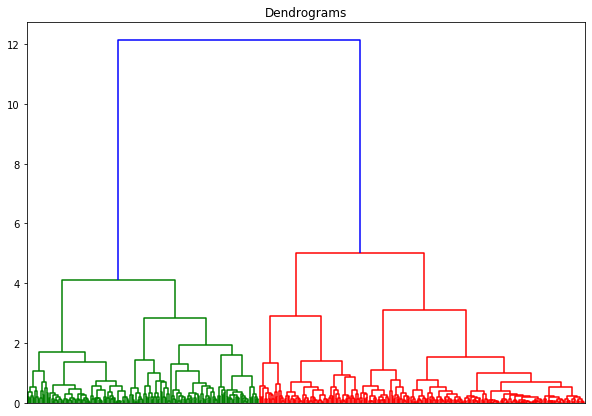

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), no_labels=True)

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance that doesn’t intersect with any clusters is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

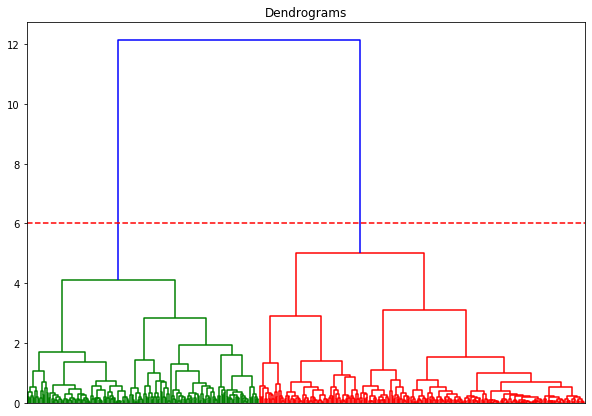

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), no_labels=True)
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:



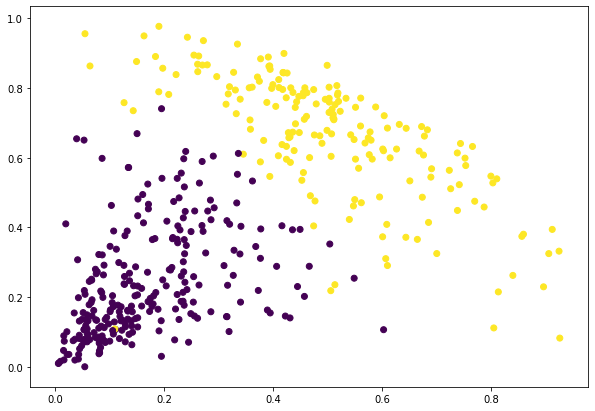

In [9]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

We can add:

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019